In [1]:
############################# Data Visualization ###########################

#Group: Big Data Developers
#Members: Akhil, Sagar, Ridhima, Ganga
#Analysis: Visualization on Parking Violations Issued - Fiscal Year 2020

############################################################################


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import os
destdir = '/Users/akhil/Desktop/nyc-parking-tickets/'
files = [ f for f in os.listdir(destdir) if os.path.isfile(os.path.join(destdir,f)) ]

In [4]:
files

['Analysis.ipynb',
 'Final queries.txt',
 'FullData.csv',
 'nyc-parking-ticket-master.zip',
 'ParkingData.csv',
 'spark akhil']

In [5]:

Fulldata = pd.read_csv('/Users/akhil/Desktop/nyc-parking-tickets/FullData.csv')


C:\Users\akhil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9,10,11,16,17,18,20,21,22,23,26,27,29,30,31,32,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Take a look into the 2016, 2017, 2018 data

In [6]:
Fulldata.head(n=2)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1363745438,JCK7576,PA,PAS,07/09/2015,21,SDN,ME/BE,P,42730,...,WHITE,0.0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN
1,1363745475,GYK7658,NY,OMS,07/09/2015,21,SUBN,NISSA,P,58130,...,BK,0.0,2015.0,-,0.0,NaN,NaN,NaN,NaN,NaN


Check row and Columns

In [7]:
Fulldata.shape

(10940405, 43)

In dataset there are about 10.9 million entries for parking ticket, and each entry has 43 columns.

Lets take a look at the number of unique values for each column name...

In [8]:
d = {'Unique Entry': Fulldata.nunique(axis = 0),
        'Nan Entry': Fulldata.isnull().any()}
pd.DataFrame(data = d, index = Fulldata.columns.values)

,Unique Entry,Nan Entry
Summons Number,10940101,False
Plate ID,3637599,True
Registration State,69,False
Plate Type,85,False
Issue Date,2359,True
Violation Code,100,False
Vehicle Body Type,2138,True
Vehicle Make,5961,True
Issuing Agency,19,False
Street Code1,14814,False


As it turns out, the last 3 columns in this dataset has no entry. So we can ignore those columns, while carrying out any visualization operation in this dataframe.



In [9]:
drop_column = ['No Standing or Stopping Violation', 'Hydrant Violation',
               'Double Parking Violation']
Fulldata.drop(drop_column, axis = 1, inplace = True)


In [10]:
Fulldata.shape

(10940405, 40)

In [11]:
df3 = Fulldata[Fulldata['Registration State'] != '99']  

In [13]:
FullData1=df3

In [15]:
FullData1.shape

(10905349, 40)

## Barplot of 'Registration State'

In [ ]:
x_ticks = FullData1['Registration State'].value_counts().index
heights = FullData1['Registration State'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()


In [17]:
pd.DataFrame(FullData1['Registration State'].value_counts()/len(FullData1)).nlargest(10, columns = ['Registration State'])

,Registration State
NY,0.784666
NJ,0.087461
PA,0.025596
CT,0.013324
FL,0.013083
IN,0.009266
MA,0.008156
VA,0.006616
MD,0.005635
NC,0.005059


You can see from the barplot above: in our sample ~78.46% cars are registered in state : **NY**. After that 8.7% cars are registered in state : **NJ**, followed by **PA**, **FL**, and **CT**.

## How the number of tickets given changes with each month?

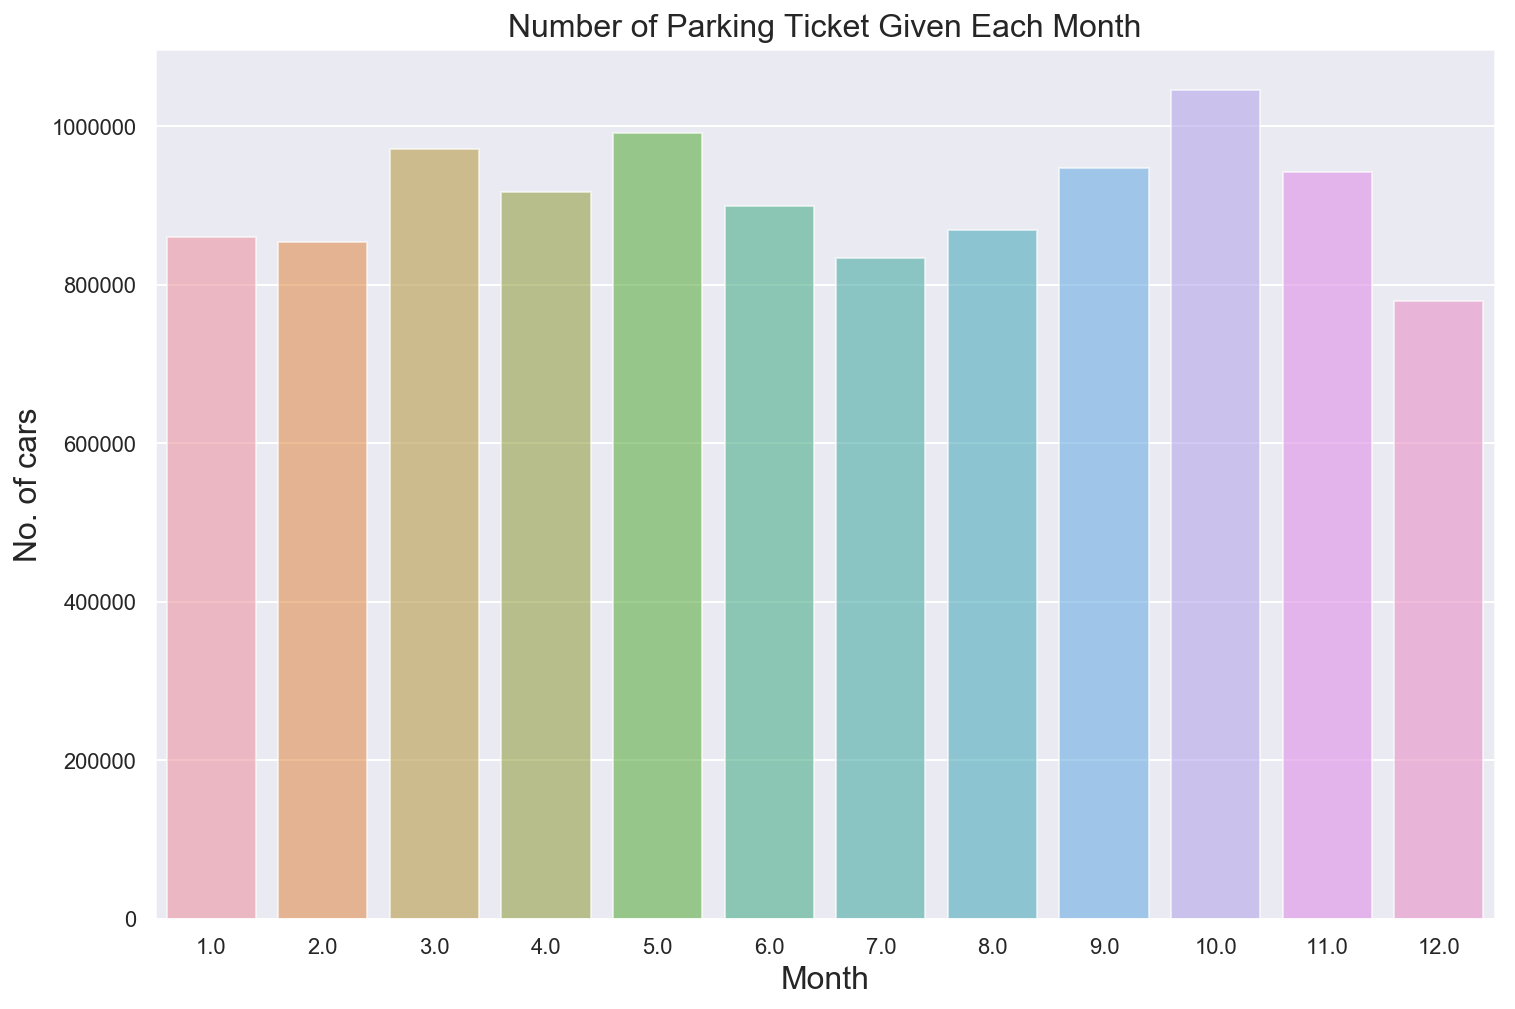

In [18]:
month = []
for time_stamp in pd.to_datetime(FullData1['Issue Date']):
    month.append(time_stamp.month)
m_count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=m_count.values, x=m_count.index, alpha=0.6)
plt.title("Number of Parking Ticket Given Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

So from the barplot above **May** and **October** has the highest number of tickets!

## How many parking tickets are given for each violation code?

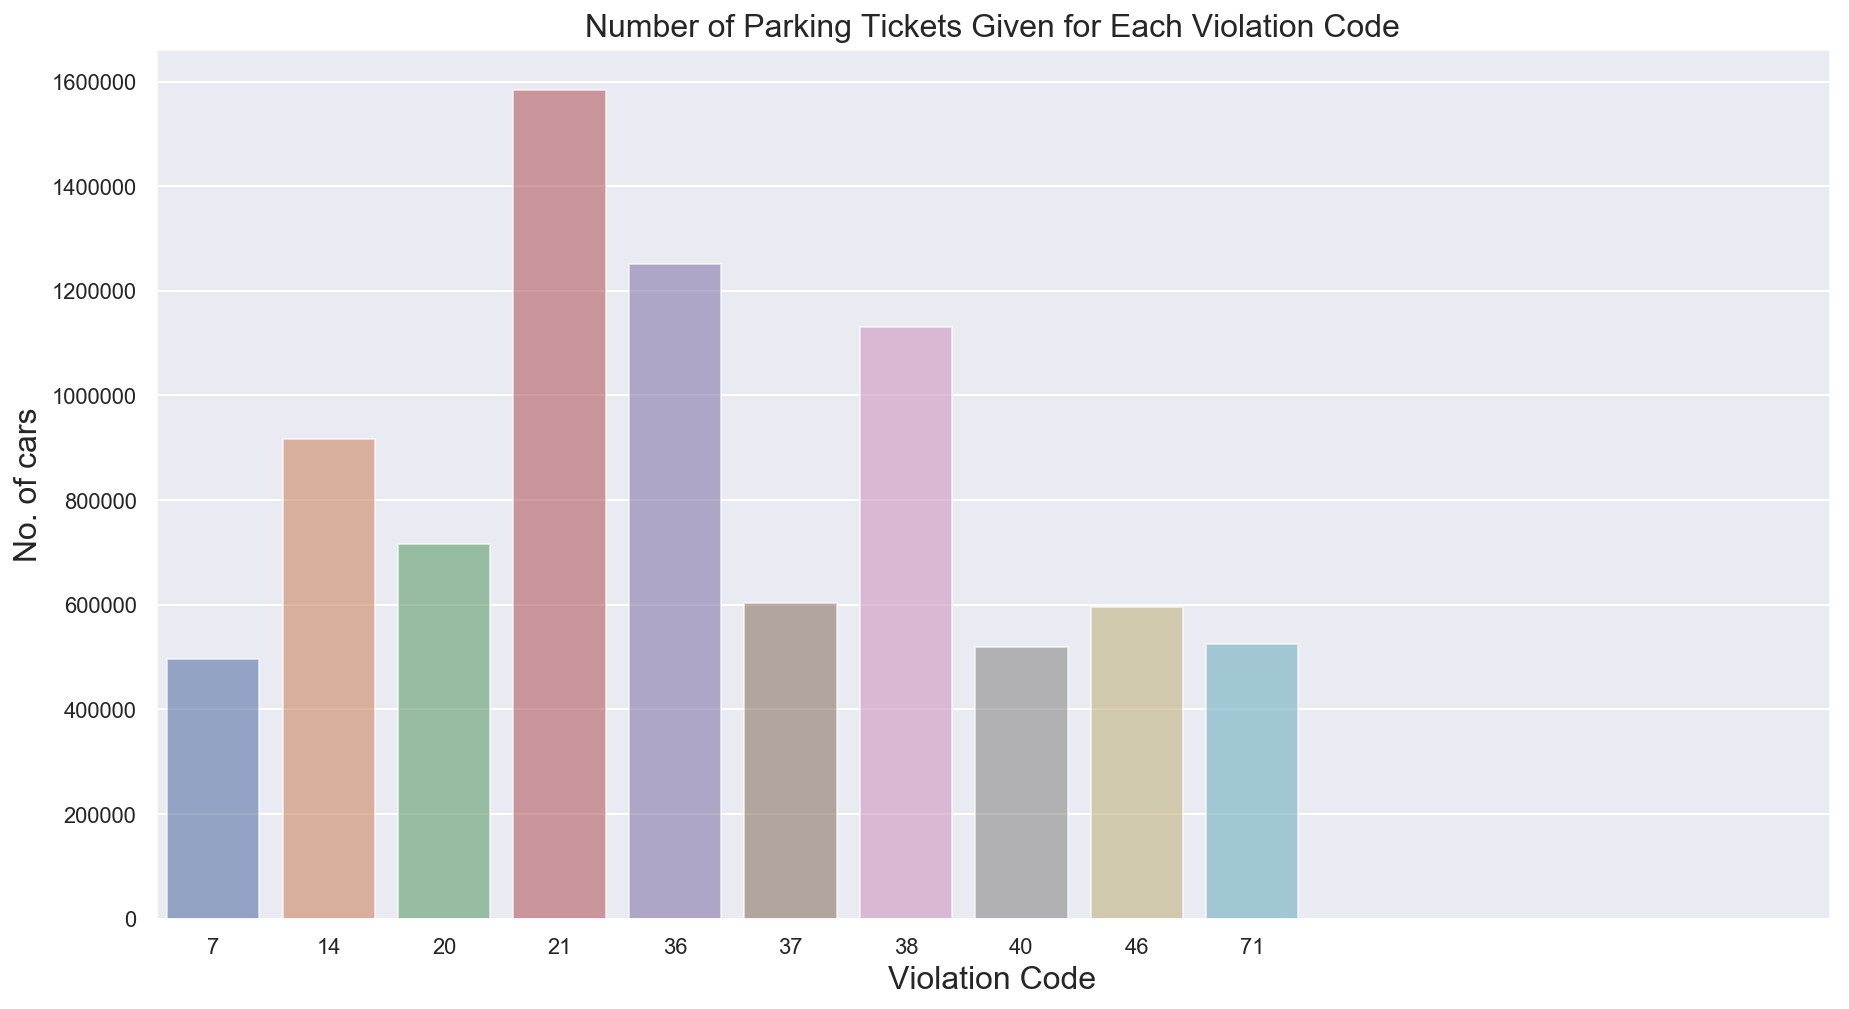

In [19]:
violation_code = FullData1['Violation Code'].value_counts().values

#print(violation_code)
height = FullData1['Violation Code'].value_counts().index
#print(height)
plt.figure(figsize=(15,8))
f = sns.barplot(y=violation_code[:10], x=height[:10], alpha=0.6)
#plt.xticks(np.arange(0,101, 10.0))
f.set(xticks=np.arange(0,15, 1.0))
plt.title("Number of Parking Tickets Given for Each Violation Code", fontsize=16)
plt.xlabel("Violation Code", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

## How many parking tickets are given for each body type?

C:\Users\akhil\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


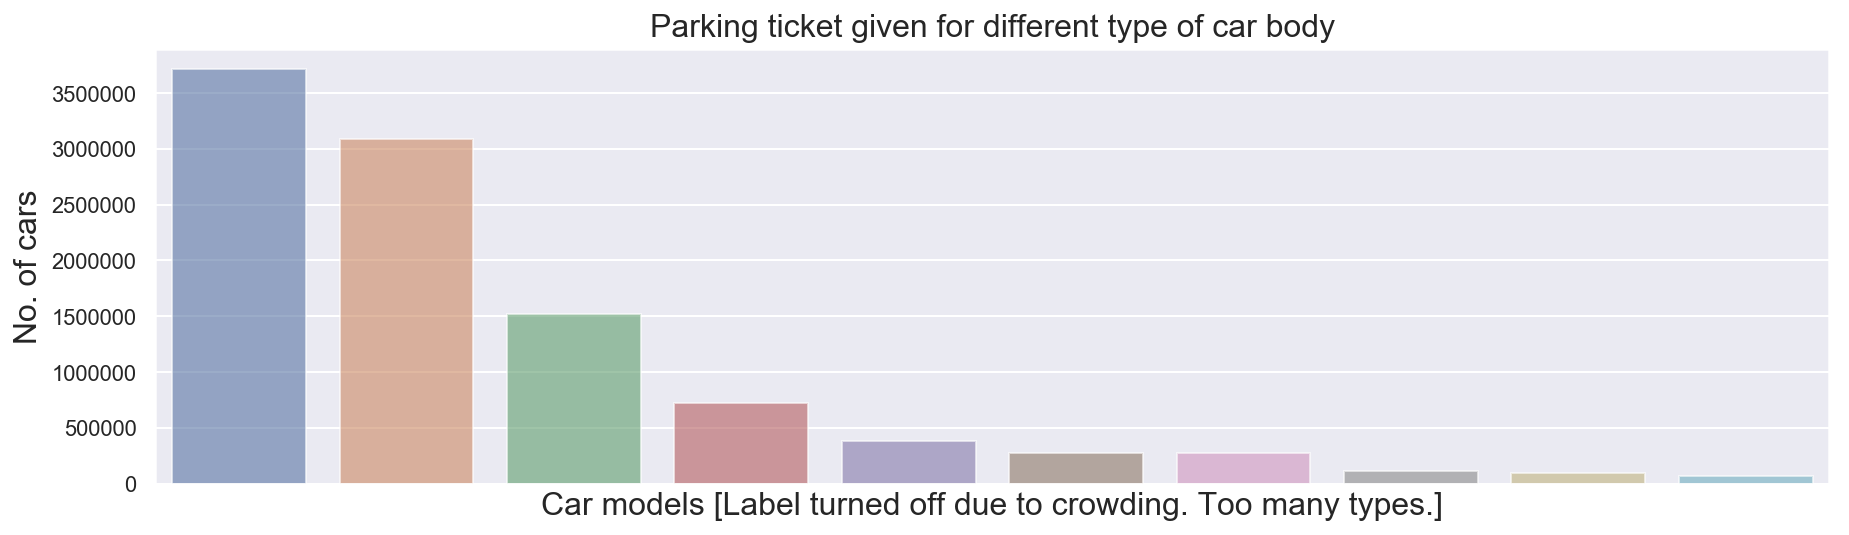

In [20]:
x_ticks = FullData1['Vehicle Body Type'].value_counts().index
#print(x_ticks)
heights = FullData1['Vehicle Body Type'].value_counts().values
#heights[:20]
#print(heights[:20])
y_pos = np.arange(len(x_ticks[:10]))
fig = plt.figure(figsize=(15,4))
f = sns.barplot(y=heights[:10], x=y_pos, orient = 'v', alpha=0.6);
# remove labels

plt.tick_params(labelbottom='off')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Car models [Label turned off due to crowding. Too many types.]', fontsize=16);
plt.title('Parking ticket given for different type of car body', fontsize=16);


In [21]:
df_bodytype = pd.DataFrame(FullData1['Vehicle Body Type'].value_counts() / len(FullData1)).nlargest(10, columns = ['Vehicle Body Type'])

Top 10 car body types that get the most parking tickets are listed below : 

In [22]:
df_bodytype

,Vehicle Body Type
SUBN,0.340207
4DSD,0.283351
VAN,0.139529
DELV,0.065923
SDN,0.034974
2DSD,0.025397
PICK,0.025307
REFG,0.010018
TRAC,0.008515
UTIL,0.005919


In [23]:
df_bodytype.sum(axis = 0)/len(FullData1)

Vehicle Body Type    8.611736e-08
dtype: float64

Top 10 vehicle body type includes 93.42% of my sample dataset.

## How many parking tickets are given for each vehicle make?

Just for the sake of changing the flavor of visualization this time I will make a logplot of car no. vs make. In that case we will be able to see much smaller values in the same graph with larger values.

C:\Users\akhil\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


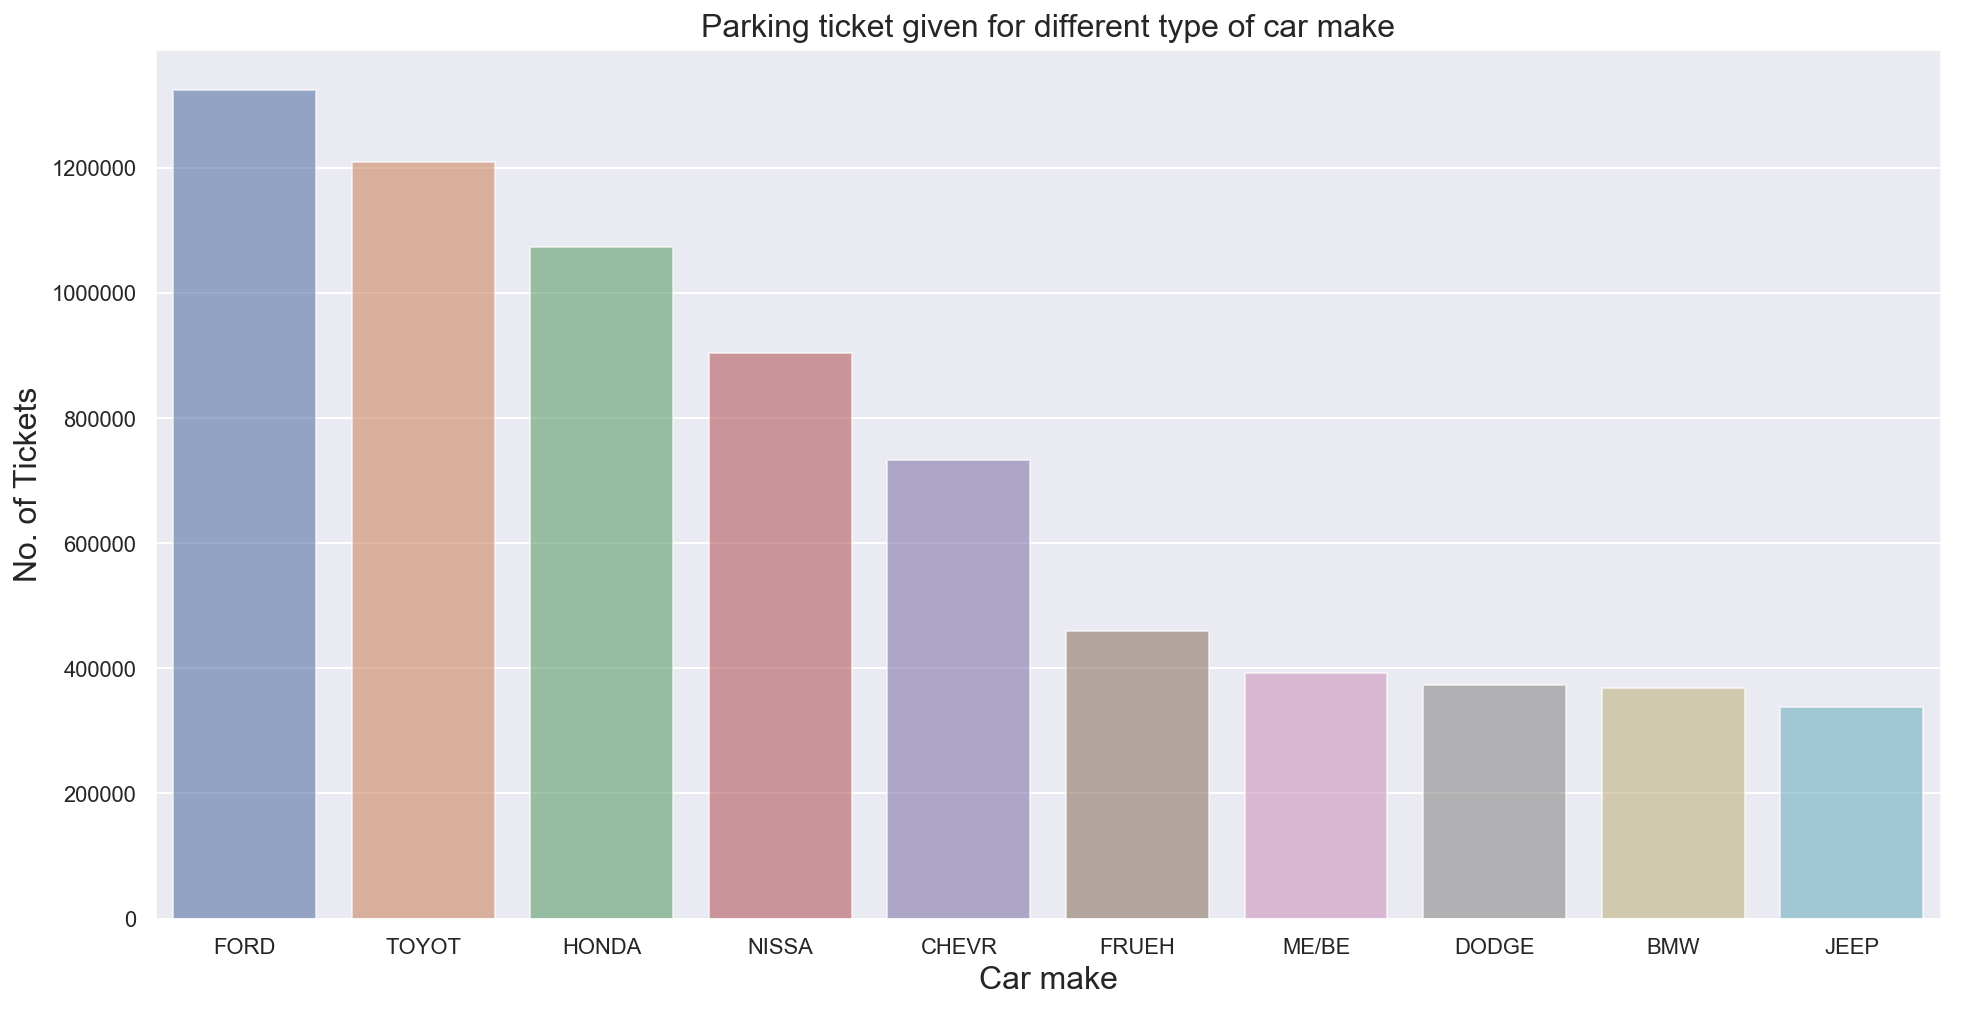

In [24]:
vehicle_make = FullData1['Vehicle Make'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=vehicle_make.values[:10], x=vehicle_make.index[:10], alpha=0.6)
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of Tickets', fontsize=16);
plt.xlabel('Car make', fontsize=16);
plt.title('Parking ticket given for different type of car make', fontsize=16);

plt.show();

In [25]:
pd.DataFrame(FullData1['Vehicle Make'].value_counts() / len(FullData1)).nlargest(10, columns = ['Vehicle Make'])

,Vehicle Make
FORD,0.121389
TOYOT,0.110820
HONDA,0.098387
NISSA,0.082940
CHEVR,0.067230
FRUEH,0.042099
ME/BE,0.035989
DODGE,0.034196
BMW,0.033792
JEEP,0.031075


## Parking ticket vs county

C:\Users\akhil\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


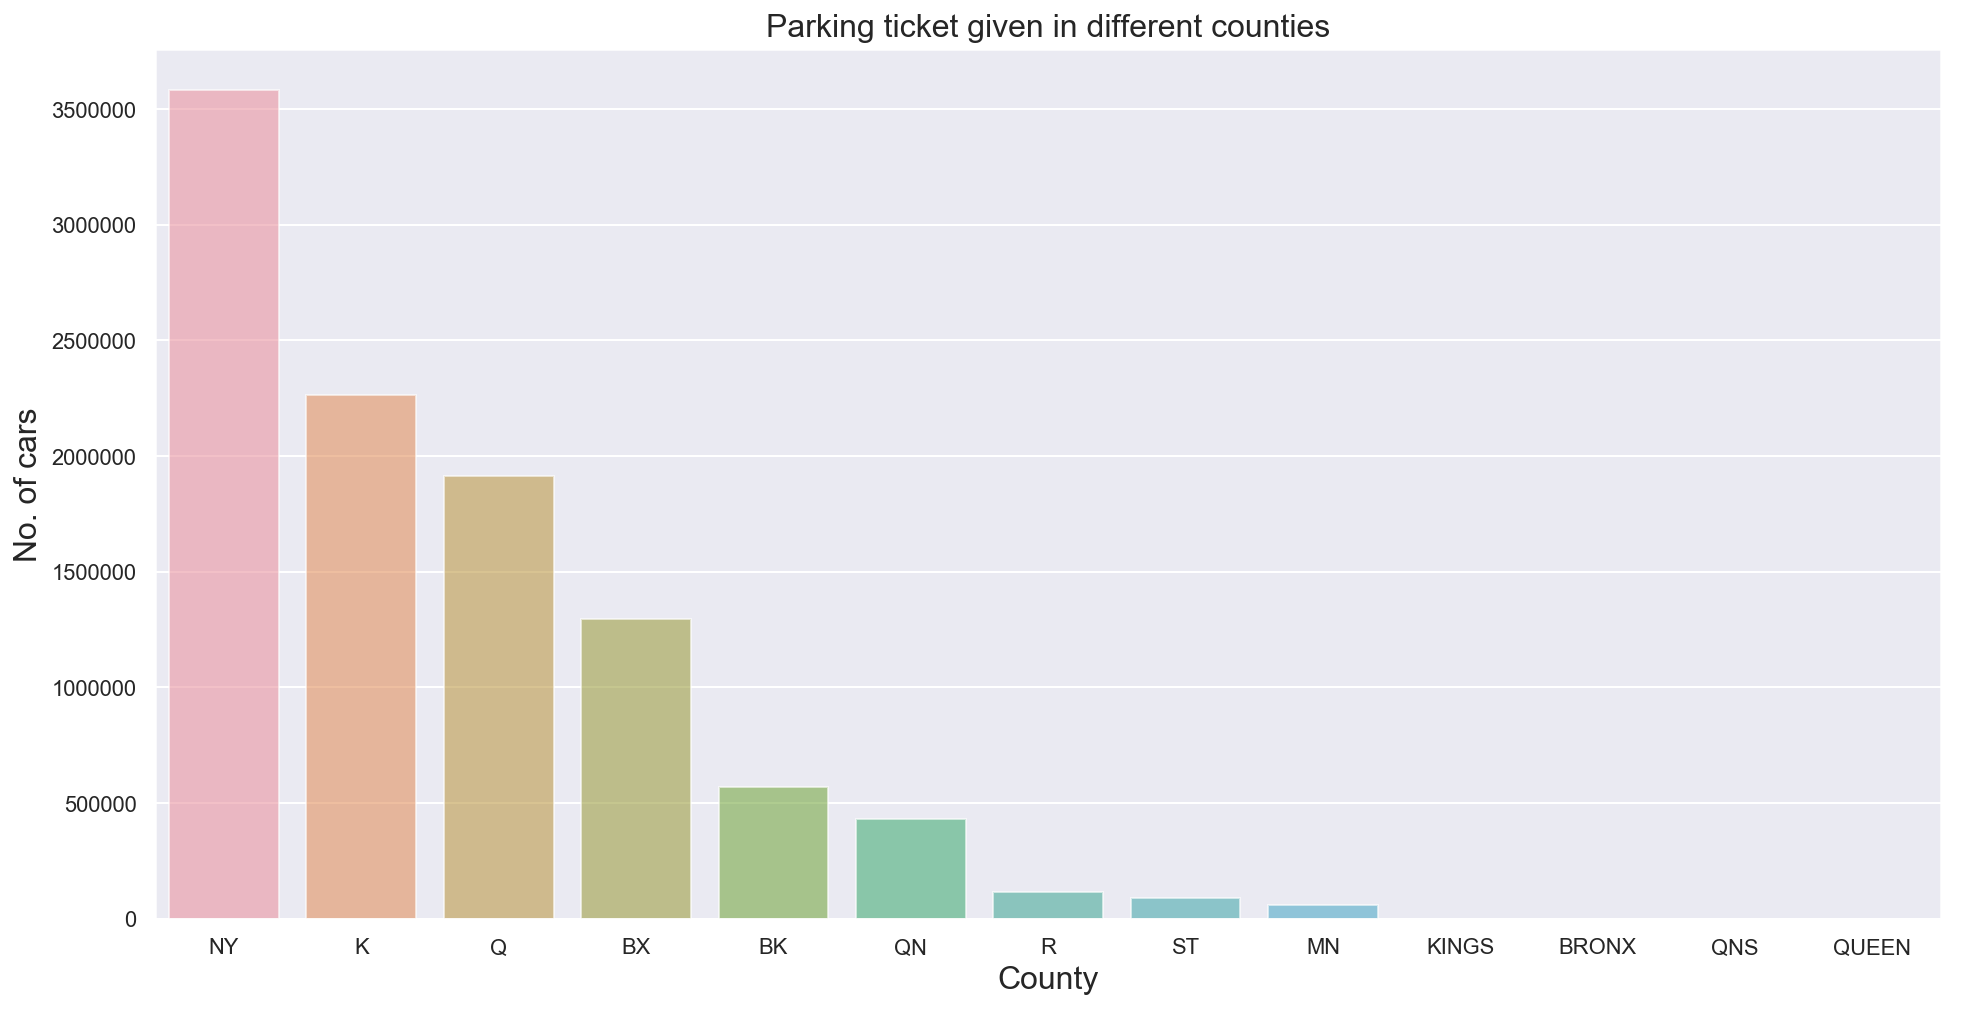

In [26]:
violation_county = FullData1['Violation County'].value_counts()

plt.figure(figsize=(16,8))
f = sns.barplot(y=violation_county.values, x=violation_county.index, alpha=0.6)
# remove labels
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking ticket given in different counties', fontsize=16);

## Unregistered Vehicle?

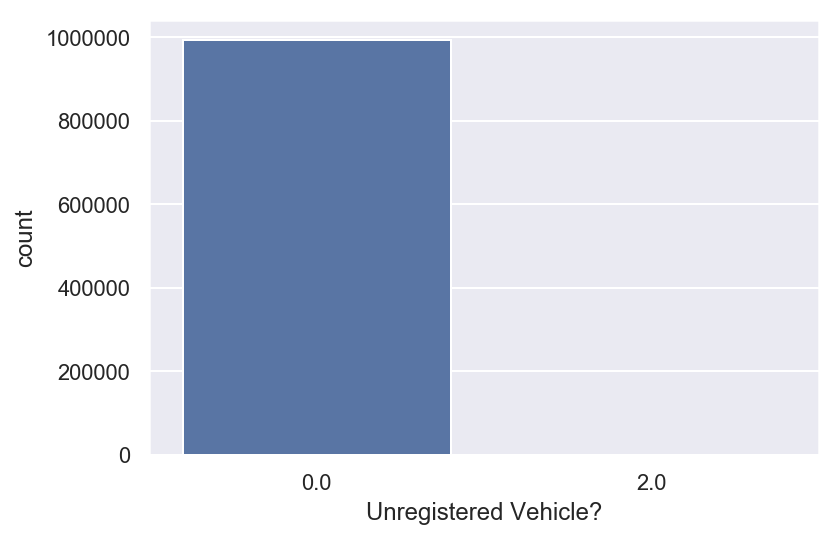

In [27]:
sns.countplot(x = 'Unregistered Vehicle?', data = FullData1)

In [28]:
FullData1['Unregistered Vehicle?'].unique()

array([ 0., nan,  2.])

## Vehicle Year

In [29]:
pd.DataFrame(FullData1['Vehicle Year'].value_counts()).nlargest(10, columns = ['Vehicle Year'])

,Vehicle Year
0.0,2406217
2015.0,1005876
2016.0,795647
2014.0,729960
2013.0,650663
2012.0,493032
2007.0,466891
2017.0,452275
2011.0,426198
2006.0,419133


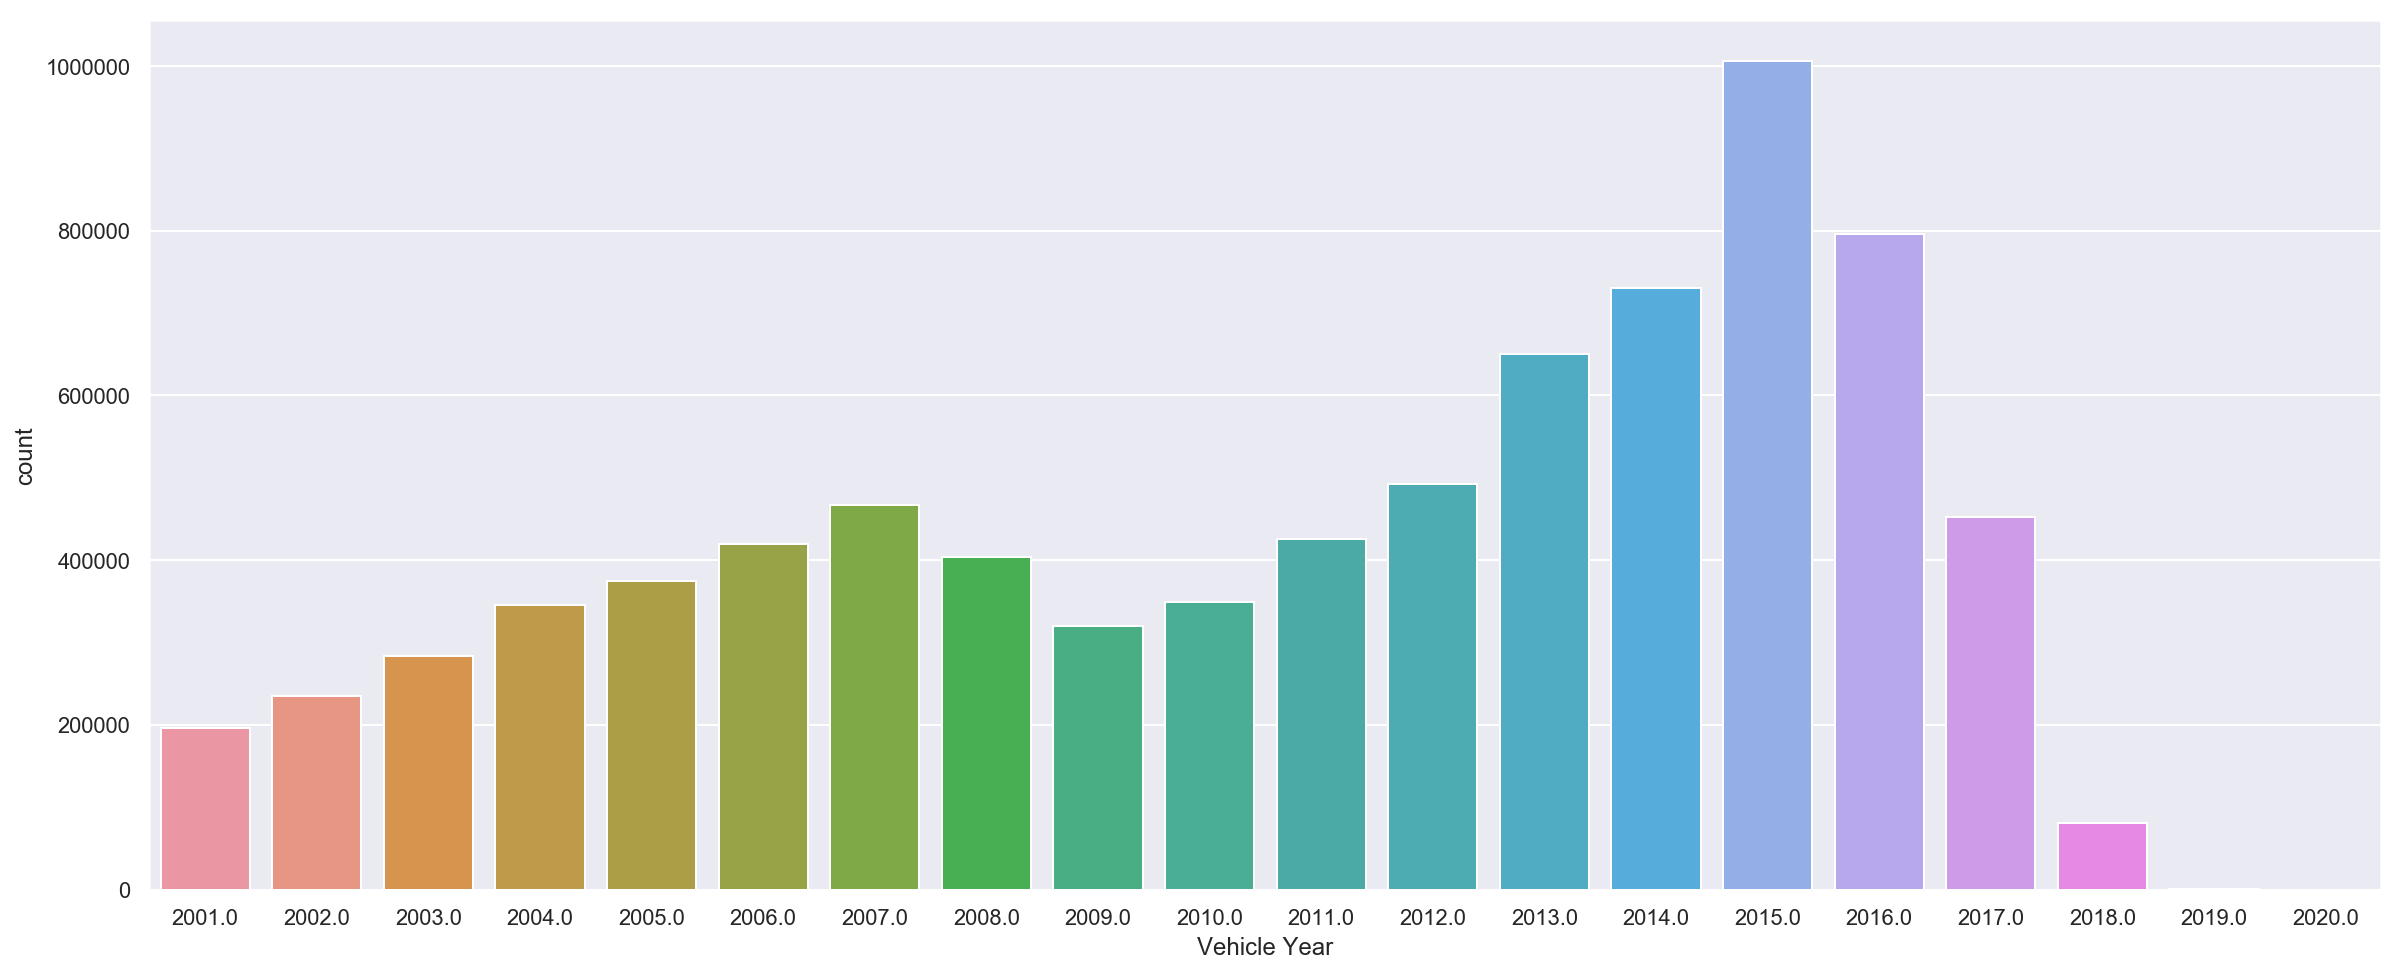

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'Vehicle Year', data = FullData1.loc[(FullData1['Vehicle Year']>2000) & (FullData1['Vehicle Year'] <= 2020)]);

## Violation In Front Of Or Opposite

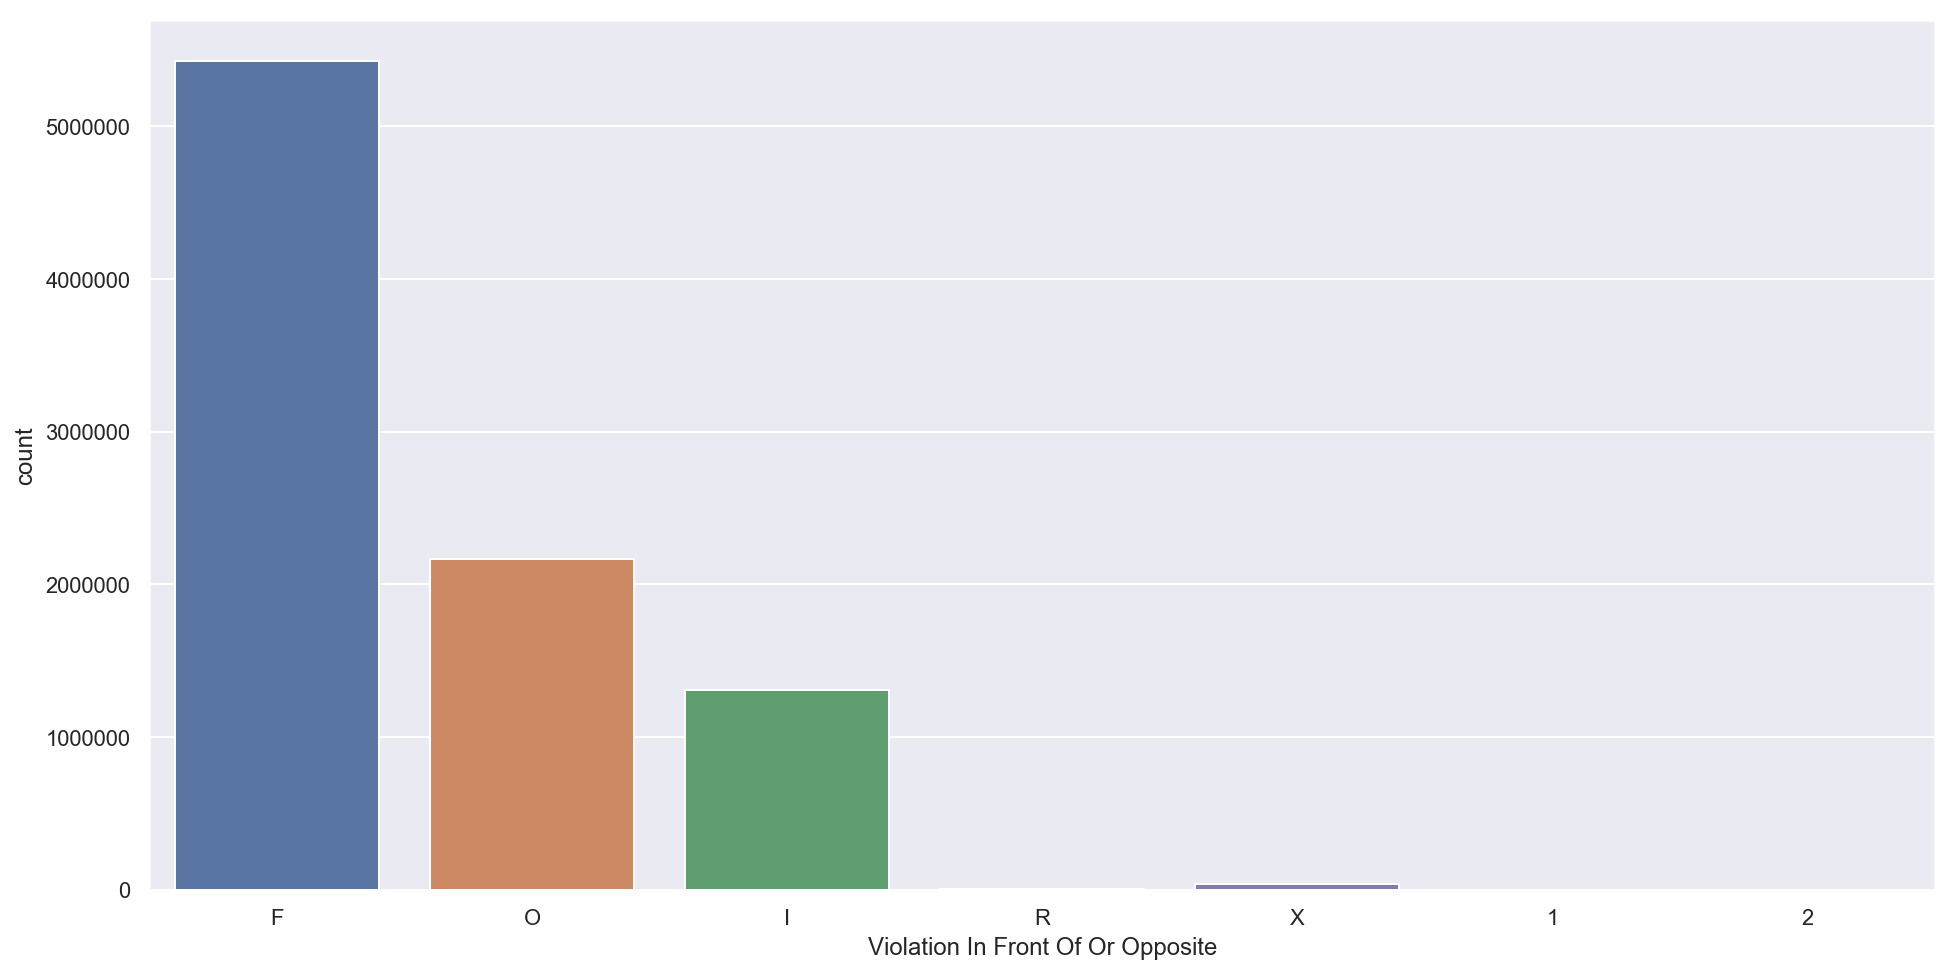

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'Violation In Front Of Or Opposite', data = FullData1);

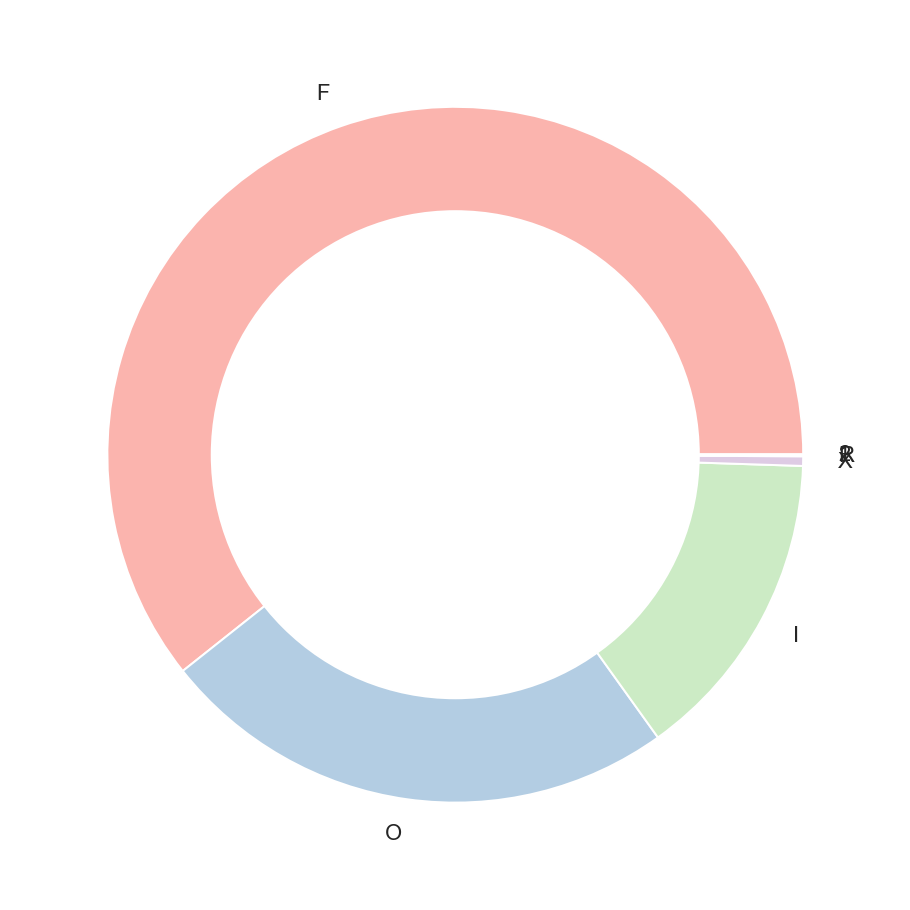

In [33]:
# create data
names = FullData1['Violation In Front Of Or Opposite'].value_counts().index
size = FullData1['Violation In Front Of Or Opposite'].value_counts().values
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.figure(figsize=(8,8))
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [135]:
pip install palettable

Note: you may need to restart the kernel to use updated packages.


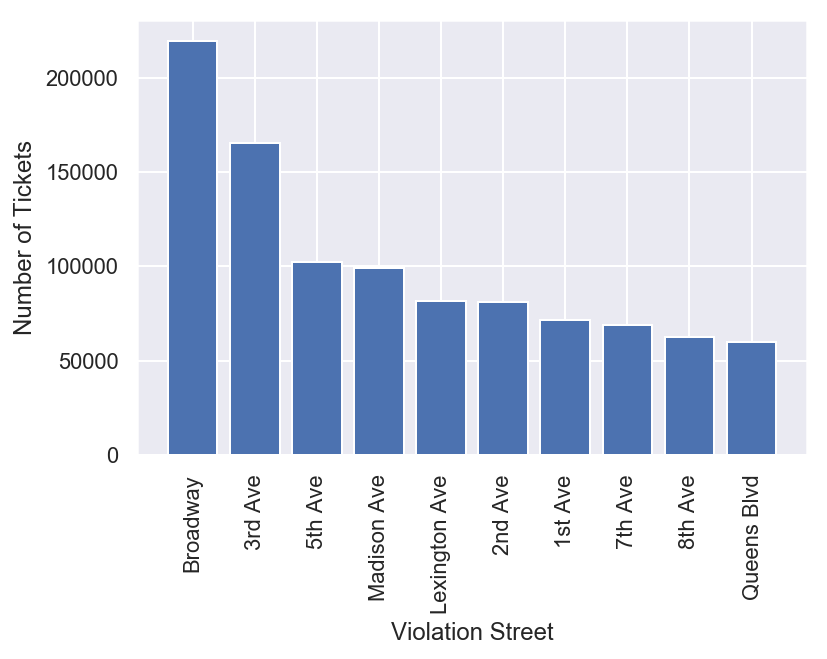

In [34]:
fig,ax1 = plt.subplots()
violation_street=pd.value_counts(FullData1['Street Name'])
violation_street=dict([(str(x),v) for x,v in violation_street.items() if x!=0])
sorted(violation_street.items(), key=lambda x: x[1])
n = 10
violation_street = {k: violation_street[k] for k in list(violation_street.keys())[:n]}
ax1.bar(violation_street.keys(),violation_street.values())
ax1.set_xlabel("Violation Street")
ax1.set_ylabel("Number of Tickets")
plt.xticks(rotation = 90)
plt.show()

In [35]:
pd.DataFrame(FullData1['Street Name'].value_counts()).nlargest(10, columns = ['Street Name'])

,Street Name
Broadway,219307
3rd Ave,165350
5th Ave,102458
Madison Ave,99215
Lexington Ave,81645
2nd Ave,80964
1st Ave,71727
7th Ave,68898
8th Ave,62450
Queens Blvd,59802


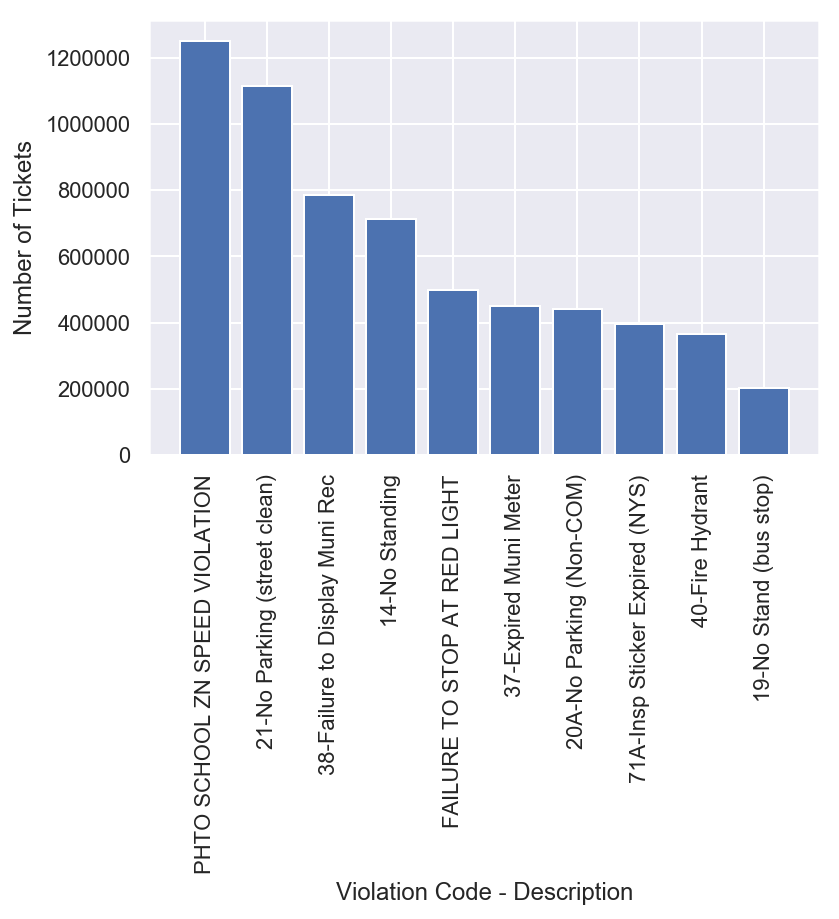

In [36]:
fig,ax1 = plt.subplots()
violation_code=pd.value_counts(FullData1['Violation Description'])
violation_code=dict([(str(x),v) for x,v in violation_code.items() if x!=0])
sorted(violation_code.items(), key=lambda x: x[1])
n = 10
violation_code = {k: violation_code[k] for k in list(violation_code.keys())[:n]}
ax1.bar(violation_code.keys(),violation_code.values())
ax1.set_xlabel("Violation Code - Description")
ax1.set_ylabel("Number of Tickets")
plt.xticks(rotation = 90)
plt.show()